In [ ]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import seaborn as sb
import matplotlib.patches as p
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from scipy import stats
from sklearn.linear_model import SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import plot_confusion_matrix
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

---
## **Q.1)**

In [ ]:
#fetching MNIST dataset
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
print(X.shape, y.shape)

(70000, 784) (70000,)


In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=0)

In [ ]:
X_train = X_train.reshape((60000,784))
X_test  = X_test.reshape((10000,784))
y_train = y_train.astype(int)
y_test = y_test.astype(int)

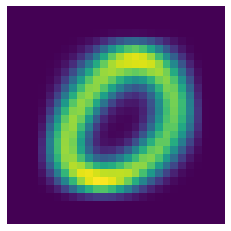

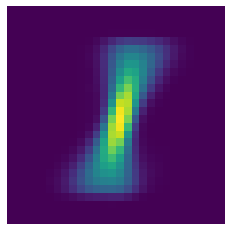

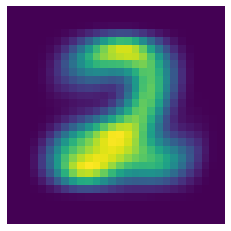

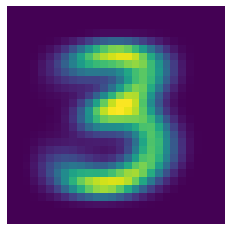

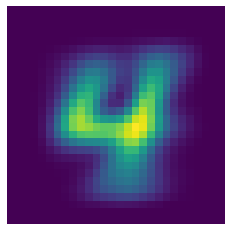

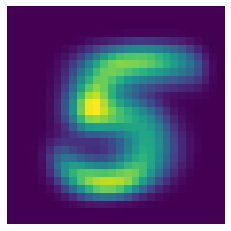

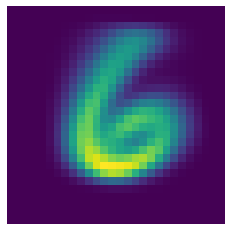

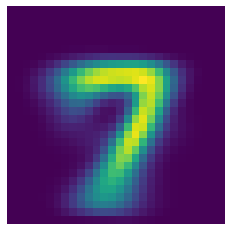

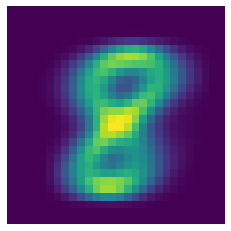

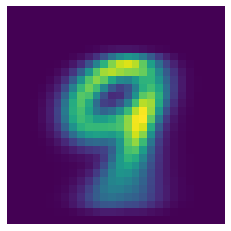

In [ ]:
#Creating mean-images for all the digits from Training dataset
mean_img = np.zeros((10,784))
for i in range(10):
  temp = []
  for j in range(len(y_train)):
    if y_train[j]==i:
      temp.append(X_train[j])
  temp = np.array(temp).reshape((len(temp),784))
  for j in range(784):
    mean_img[i][j] = np.mean(temp[:,j])
  plt.figure()
  plt.imshow(mean_img[i].reshape((28,28)))
  plt.axis('off')
  plt.show()

---
## **Q.2)**

In [ ]:
#LDA binary 
X_train_cpy = np.delete(X_train, np.where(y_train>1), axis=0)
y_train_cpy = np.delete(y_train, np.where(y_train>1), axis=0)
X_test_cpy = np.delete(X_test, np.where(y_test>1), axis=0)
y_test_cpy = np.delete(y_test, np.where(y_test>1), axis=0)

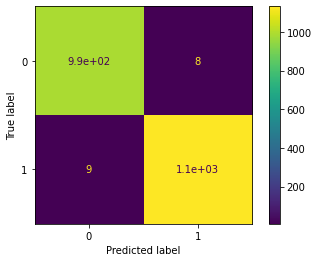

In [ ]:

clf = LinearDiscriminantAnalysis()
clf.fit(X_train_cpy, y_train_cpy)

plot_confusion_matrix(clf, X_test_cpy, y_test_cpy)  
plt.show()

In [ ]:
y_predicted = clf.predict(X_test_cpy)
print('Accuracy:', accuracy_score(y_test_cpy,y_predicted))

Accuracy: 0.9920449227889565


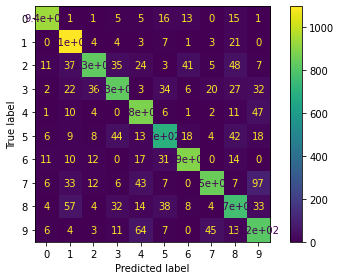

In [ ]:
#LDA muliclass

clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)

plot_confusion_matrix(clf, X_test, y_test)  
plt.tight_layout()
plt.show()

In [ ]:
y_predicted = clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test,y_predicted))

Accuracy: 0.861


---
## **Q.3)**

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


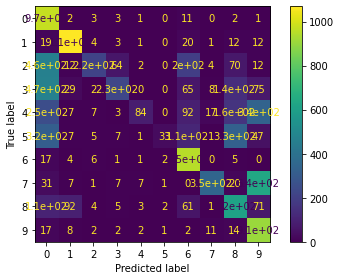

In [ ]:
#QDA
clf = QuadraticDiscriminantAnalysis()
clf.fit(X_train, y_train)

plot_confusion_matrix(clf, X_test, y_test)  
plt.tight_layout()
plt.show()

In [ ]:
y_predicted = clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test,y_predicted))

Accuracy: 0.5426


---
## **Q.4)**

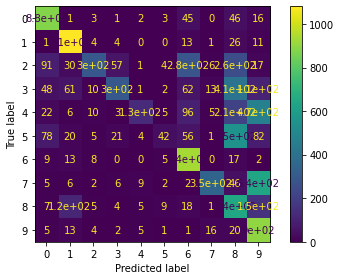

In [ ]:
#Naive-Bayes
clf = GaussianNB()
clf.fit(X_train, y_train)

plot_confusion_matrix(clf, X_test, y_test)  
plt.tight_layout()
plt.show()

In [ ]:
y_predicted = clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test,y_predicted))

Accuracy: 0.5555


---
## **Q.5)**

In [ ]:
mu1 = 8
sigma1 = np.sqrt(20)

mu2 = 16
sigma2 = np.sqrt(25)

In [ ]:
def gauss(x,mu,sigma):
  return (1/(sigma*(np.sqrt(2*np.pi))))*np.exp(-(x-mu)**2 / (2*(sigma**2)))

In [ ]:
def probs(x,p1,p2,mu1,sigma1,mu2,sigma2):
  a1 = gauss(x,mu1,sigma1)
  a2 = gauss(x,mu2,sigma2)
  a1 = p1*a1
  a2 = p2*a2
  return a1/(a1+a2),a2/(a1+a2)

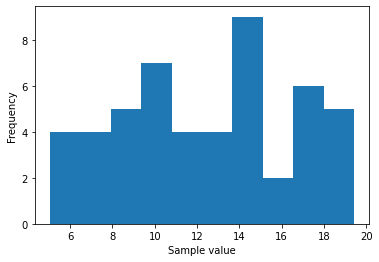

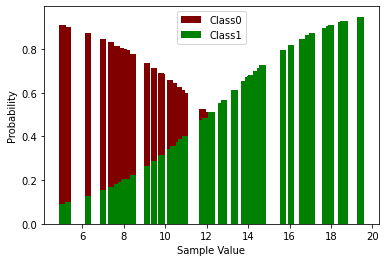

In [ ]:
p1 = 0.5
p2 = 0.5

samples = np.random.uniform(5,20,50)
y1 = np.zeros(len(samples))
y2 = np.zeros(len(samples))
for i in range(len(samples)):
  y1[i],y2[i] = probs(samples[i],p1,p2,mu1,sigma1,mu2,sigma2)
plt.hist(samples)
plt.xlabel('Sample value')
plt.ylabel('Frequency')
plt.figure()
plt.bar(samples, y1, color ='maroon', width = 0.3,label = 'Class0')
plt.bar(samples, y2, color ='green', width = 0.3, label='Class1')
plt.xlabel('Sample Value')
plt.ylabel('Probability')
plt.legend()
plt.show()

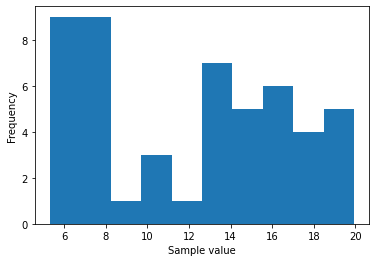

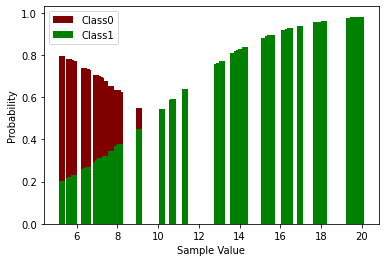

In [ ]:
p1 = 0.3
p2 = 0.7

samples = np.random.uniform(5,20,50)
y1 = np.zeros(len(samples))
y2 = np.zeros(len(samples))
for i in range(len(samples)):
  y1[i],y2[i] = probs(samples[i],p1,p2,mu1,sigma1,mu2,sigma2)
plt.hist(samples)
plt.xlabel('Sample value')
plt.ylabel('Frequency')
plt.figure()
plt.bar(samples, y1, color ='maroon', width = 0.3,label = 'Class0')
plt.bar(samples, y2, color ='green', width = 0.3, label='Class1')
plt.xlabel('Sample Value')
plt.ylabel('Probability')
plt.legend()
plt.show()

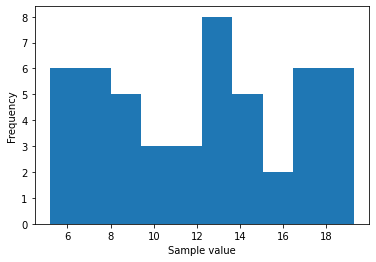

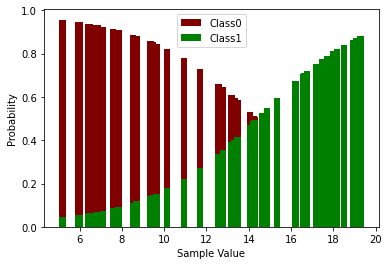

In [ ]:
p1 = 0.7
p2 = 0.3

samples = np.random.uniform(5,20,50)
y1 = np.zeros(len(samples))
y2 = np.zeros(len(samples))
for i in range(len(samples)):
  y1[i],y2[i] = probs(samples[i],p1,p2,mu1,sigma1,mu2,sigma2)
plt.hist(samples)
plt.xlabel('Sample value')
plt.ylabel('Frequency')
plt.figure()
plt.bar(samples, y1, color ='maroon', width = 0.3,label = 'Class0')
plt.bar(samples, y2, color ='green', width = 0.3, label='Class1')
plt.xlabel('Sample Value')
plt.ylabel('Probability')
plt.legend()
plt.show()

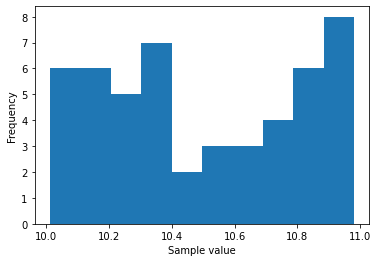

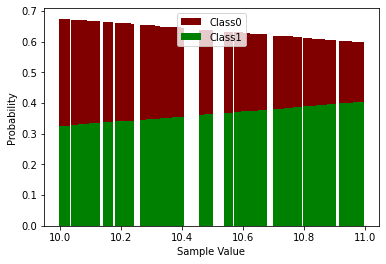

In [ ]:
p1 = 0.5
p2 = 0.5

samples = np.random.uniform(11,10,50)
y1 = np.zeros(len(samples))
y2 = np.zeros(len(samples))
for i in range(len(samples)):
  y1[i],y2[i] = probs(samples[i],p1,p2,mu1,sigma1,mu2,sigma2)
plt.hist(samples)
plt.xlabel('Sample value')
plt.ylabel('Frequency')
plt.figure()
plt.bar(samples, y1, color ='maroon', width = 0.03,label = 'Class0')
plt.bar(samples, y2, color ='green', width = 0.03, label='Class1')
plt.xlabel('Sample Value')
plt.ylabel('Probability')
plt.legend()
plt.show()

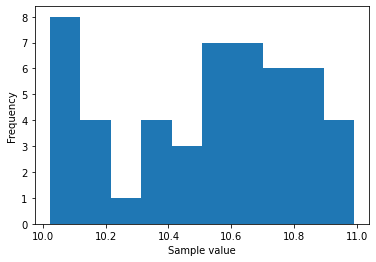

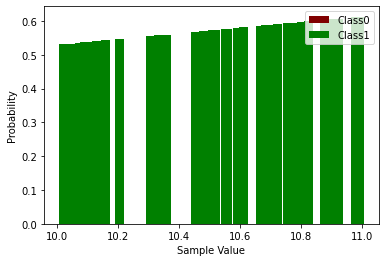

In [ ]:
p1 = 0.3
p2 = 0.7

samples = np.random.uniform(11,10,50)
y1 = np.zeros(len(samples))
y2 = np.zeros(len(samples))
for i in range(len(samples)):
  y1[i],y2[i] = probs(samples[i],p1,p2,mu1,sigma1,mu2,sigma2)
plt.hist(samples)
plt.xlabel('Sample value')
plt.ylabel('Frequency')
plt.figure()
plt.bar(samples, y1, color ='maroon', width = 0.03,label = 'Class0')
plt.bar(samples, y2, color ='green', width = 0.03, label='Class1')
plt.xlabel('Sample Value')
plt.ylabel('Probability')
plt.legend()
plt.show()

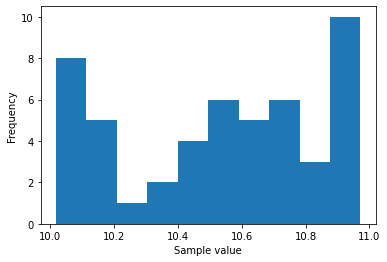

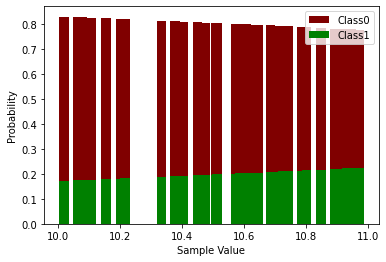

In [ ]:
p1 = 0.7
p2 = 0.3

samples = np.random.uniform(11,10,50)
y1 = np.zeros(len(samples))
y2 = np.zeros(len(samples))
for i in range(len(samples)):
  y1[i],y2[i] = probs(samples[i],p1,p2,mu1,sigma1,mu2,sigma2)
plt.hist(samples)
plt.xlabel('Sample value')
plt.ylabel('Frequency')
plt.figure()
plt.bar(samples, y1, color ='maroon', width = 0.03,label = 'Class0')
plt.bar(samples, y2, color ='green', width = 0.03, label='Class1')
plt.xlabel('Sample Value')
plt.ylabel('Probability') 
plt.legend()
plt.show()

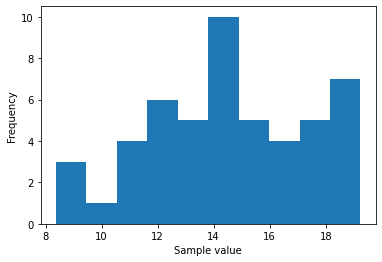

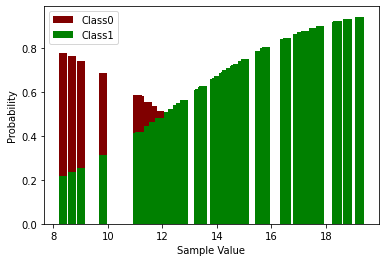

In [ ]:
p1 = 0.5
p2 = 0.5

samples = np.random.uniform(20,8,50)
y1 = np.zeros(len(samples))
y2 = np.zeros(len(samples))
for i in range(len(samples)):
  y1[i],y2[i] = probs(samples[i],p1,p2,mu1,sigma1,mu2,sigma2)
plt.hist(samples)
plt.xlabel('Sample value')
plt.ylabel('Frequency')
plt.figure()
plt.bar(samples, y1, color ='maroon', width = 0.3,label = 'Class0')
plt.bar(samples, y2, color ='green', width = 0.3, label='Class1')
plt.xlabel('Sample Value')
plt.ylabel('Probability')
plt.legend()
plt.show()

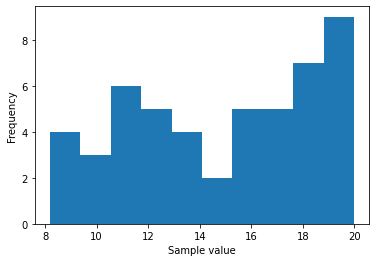

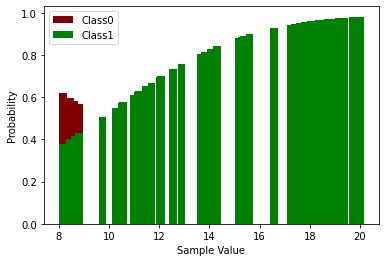

In [ ]:
p1 = 0.3
p2 = 0.7

samples = np.random.uniform(20,8,50)
y1 = np.zeros(len(samples))
y2 = np.zeros(len(samples))
for i in range(len(samples)):
  y1[i],y2[i] = probs(samples[i],p1,p2,mu1,sigma1,mu2,sigma2)
plt.hist(samples)
plt.xlabel('Sample value')
plt.ylabel('Frequency')
plt.figure()
plt.bar(samples, y1, color ='maroon', width = 0.3,label = 'Class0')
plt.bar(samples, y2, color ='green', width = 0.3, label='Class1')
plt.xlabel('Sample Value')
plt.ylabel('Probability')
plt.legend()
plt.show()

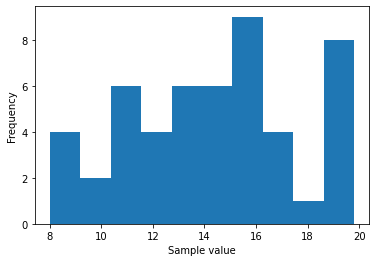

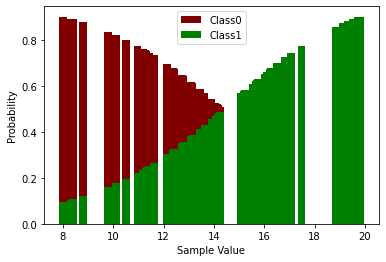

In [ ]:
p1 = 0.7
p2 = 0.3

samples = np.random.uniform(20,8,50)
y1 = np.zeros(len(samples))
y2 = np.zeros(len(samples))
for i in range(len(samples)):
  y1[i],y2[i] = probs(samples[i],p1,p2,mu1,sigma1,mu2,sigma2)
plt.hist(samples)
plt.xlabel('Sample value')
plt.ylabel('Frequency')
plt.figure()
plt.bar(samples, y1, color ='maroon', width = 0.3,label = 'Class0')
plt.bar(samples, y2, color ='green', width = 0.3, label='Class1')
plt.xlabel('Sample Value')
plt.ylabel('Probability')
plt.legend()
plt.show()